In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
bigmart = pd.read_csv(r'C:\Users\nimesh.yadav\Desktop\Python\Module_4\Datasets\BigMartSalesData.csv')
bigmart.fillna(0)
bigmart.describe()

,Quantity,UnitPrice,Amount,Day,Month,Year,CustomerID
count,541874.000000,541874.000000,541874.000000,541874.000000,541874.000000,541874.000000,406829.000000
mean,11.341028,4.610038,21.297578,15.022902,7.553228,2010.921607,15287.690570
std,218.002505,96.762800,378.651364,8.663960,3.509063,0.268789,1713.600303
min,1.000000,-11062.060000,-11062.060000,1.000000,1.000000,2010.000000,12346.000000
25%,1.000000,1.250000,3.750000,7.000000,5.000000,2011.000000,13953.000000
50%,3.000000,2.080000,9.900000,15.000000,8.000000,2011.000000,15152.000000
75%,10.000000,4.130000,17.700000,22.000000,11.000000,2011.000000,16791.000000
max,80995.000000,38970.000000,168469.600000,31.000000,12.000000,2011.000000,18287.000000


In [147]:
# Data Wrangling
# Creating dataframe for only year of 2011

required_data = bigmart[bigmart['Year'] == 2011]
required_data.head(3)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Amount,InvoiceDate,Day,Month,Year,CustomerID,Country
42479,539993,22386,JUMBO BAG PINK POLKADOT,10,1.95,19.5,04-01-11,4,1,2011,13313.0,United Kingdom
42480,539993,21499,BLUE POLKADOT WRAP,25,0.42,10.5,04-01-11,4,1,2011,13313.0,United Kingdom
42481,539993,21498,RED RETROSPOT WRAP,25,0.42,10.5,04-01-11,4,1,2011,13313.0,United Kingdom


In [148]:
selected_data = required_data.loc[:,['Month', 'Amount', 'Country']]

In [149]:
## Grouping by month to calculate total sales on Monthly basis
grouped = selected_data.groupby('Month')
months = list(grouped.groups)
print(months)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [152]:
grouped_sum = np.array(grouped.sum()).ravel()
print(grouped_sum)

[ 822669.64        549134.46000002  752003.31000001  582318.45100002
  817655.20000001  832231.67000002  757108.94100002  791173.02000002
 1097467.72199999 1239237.25999991 1557236.40999972  843909.02000001]


### 1. Plot Total Sales Per Month for Year 2011.  How the total sales have increased over months in Year 2011. Which month has lowest Sales?

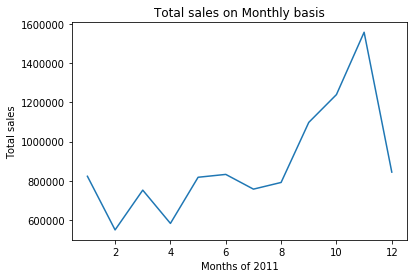

'Month of February(2nd month of 2011) has lowest sales in 2011.'

In [153]:
plt.plot(months,grouped_sum)
plt.xlabel('Months of 2011')
plt.ylabel('Total sales')
plt.title('Total sales on Monthly basis')
plt.show()
'''Month of February(2nd month of 2011) has lowest sales in 2011.'''

### 2. Plot Total Sales Per Month for Year 2011 as Bar Chart.  Is Bar Chart Better to visualize than Simple Plot

### Enhancement:
1. Change the bar chart to show the value of bar

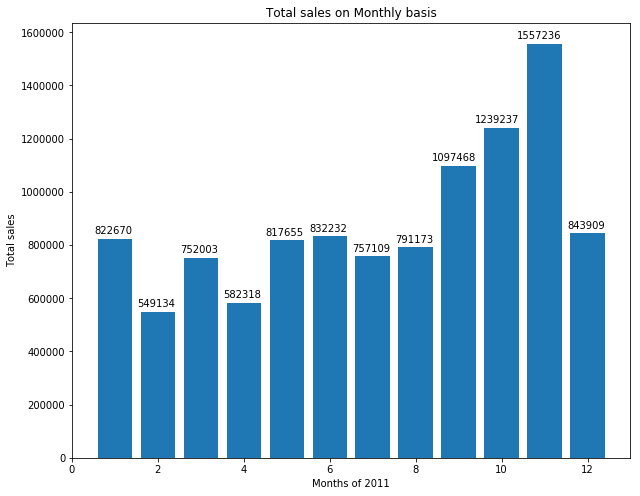

' Yes, bar chart is better to visualize than simple plot as we can see proper bars on monthly basis for each months total sales.'

In [130]:
plt.figure(figsize=(10,8))
bar = plt.bar(months,grouped_sum)
plt.xlabel('Months of 2011')
plt.ylabel('Total sales')
plt.title('Total sales on Monthly basis')
for i in range(len(grouped_sum)):
    plt.annotate('{0:.0f}'.format(bar[i].get_height()),xy=(bar[i].get_x() + bar[i].get_width(),bar[i].get_height()),
                 xytext=(0,3),
                 textcoords='offset points',
                 ha='right',
                 va='bottom'
                )
plt.show()

''' Yes, bar chart is better to visualize than simple plot as we can see proper bars on monthly basis for each months total sales.'''

### 3. Plot Pie Chart for Year 2011 Country Wise. Which Country contributes highest towards sales

In [154]:
country_grouped = selected_data[['Amount','Country']].groupby('Country')
country_sum = country_grouped.sum()
countries = list(country_grouped.groups)
country_sum

,Amount
Country,
Australia,1.389047e+05
Austria,9.945680e+03
Bahrain,7.541400e+02
Belgium,3.967181e+04
Brazil,1.143600e+03
Canada,3.666380e+03
Channel Islands,2.045106e+04
Cyprus,1.264365e+04
Czech Republic,9.457600e+02


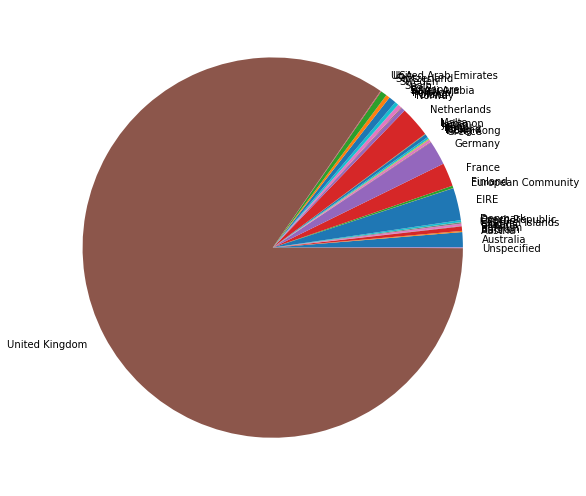

' United Kingdom contributes highest toward sales '

In [155]:
plt.figure(figsize=(7,7))
plt.pie(country_sum,
        labels=countries,
        #autopct='%1.1f%%'
        )
plt.tight_layout()
plt.show()

''' United Kingdom contributes highest toward sales '''

### Enhancement :
2. In Pie Chart Play With Parameters shadow=True, startangle=90 and see how different the chart looks

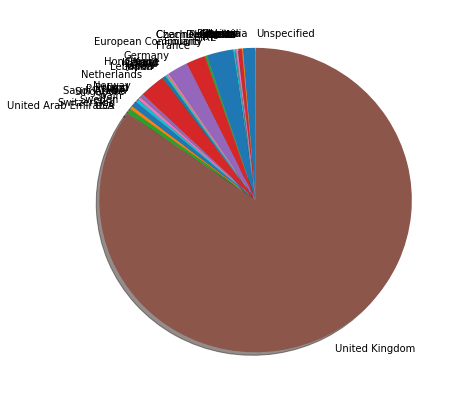

In [156]:
plt.figure(figsize=(7,7))
plt.pie(country_sum,
        labels=countries,
        shadow = True,
        startangle = 90
        )
plt.show()

### 4. Plot Scatter Plot for the invoice amounts and see the concentration of amount.  In which range most of the invoice amounts are concentrated  

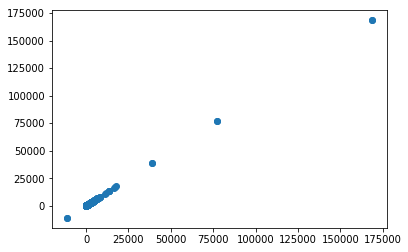

' Invoice amounts are concentrated in the range of 0 to 25000 '

In [157]:
x=y= bigmart['Amount']
plt.scatter(x,y,vmin=0,vmax = 1500)
plt.show()
''' Invoice amounts are concentrated in the range of 0 to 25000 '''

### Enhancement
3. In scatter plot change the color of Scatter Points 

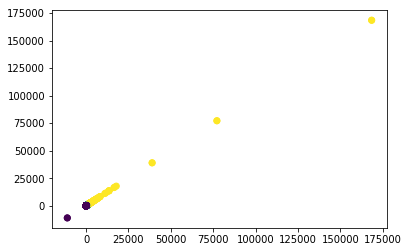

In [159]:
x=y= bigmart['Amount']
plt.scatter(x,y,vmin=0,vmax = 1500,c = bigmart['Amount'] )
plt.show()